## Loading the SAGEOMAG database and plotting some examples

##### This is a simple tutorial that you can use to load the SAGEOMAG database, apply some filters and plot some simple figures. You can also modify the scripts according to your purpose.

### Importing and displaying the SAGEOMAG database

##### To get started, you may need to update 'openpyxl' via terminal or Anaconda prompt.

#### a) If you are using Anaconda, type in the Anaconda Prompt:

In [ ]:
conda update openpyxl

#### b) Or if you are using 'pip', type at the Command Prompt:

In [ ]:
pip install --upgrade openpyxl

#### Once you have the updated version of 'openpyxl', you can view the complete SAGEOMAG database by running the following script:

In [1]:
# importing the 'Pandas' library to read the SAGEOMAG database in Excel format
import pandas as pd

# reading the SAGEOMAG database with the 'sageomag' variable
# you should replace '...path...' with the path where the SAGEOMAG_database.xlsx file is located on your computer
sageomag = pd.read_excel(r"C:\Users\Victor\Desktop\Paper01_JGR_Revisions01\SAGEOMAG_database_v1.xlsx", engine='openpyxl')

In [ ]:
# display the database
display(sageomag)

#### Note:
##### If you are unable to install the latest version of 'openpyxl' via Anaconda Prompt or Command Prompt, you can run the above script without including the engine='openpyxl' command inside the 'sageomag' variable argument.

#### If you want to display all rows and all columns of the imported file, you can run the following code:

In [ ]:
# setting 'Pandas' to display all rows and columns of the file
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(sageomag)

## Example 01 - Visualizing all Brazilian data

In [ ]:
# filter 1: selecting only data from Brazil
filter_1 = sageomag[sageomag["location"] == "Brazil"]

display(filter_1)

## Example 02 - Visualizing only specimen-level data from Argentina

In [ ]:
# filter 2: selecting only specimen-level data from Argentina
filter_2 = sageomag[(sageomag["level"] == 3) & (sageomag["location"] == "Argentina")]

display(filter_2)

## Example 03 - Visualizing data from Peru that present cooling rate or anisotropy correction

In [ ]:
# Filter 3: selecting data from Peru that present cooling rate ("CR corr.") OR anisotropy ("ANIS corr.") correction
filter_3 = sageomag[(sageomag["location"] == "Peru") & ((sageomag["cr_corr"] == "YES") | (sageomag["anis_corr"] == "YES"))]

display(filter_3)

## Example 04 - Plotting a histogram to visualize the number of Peruvian site-level data as a function of age

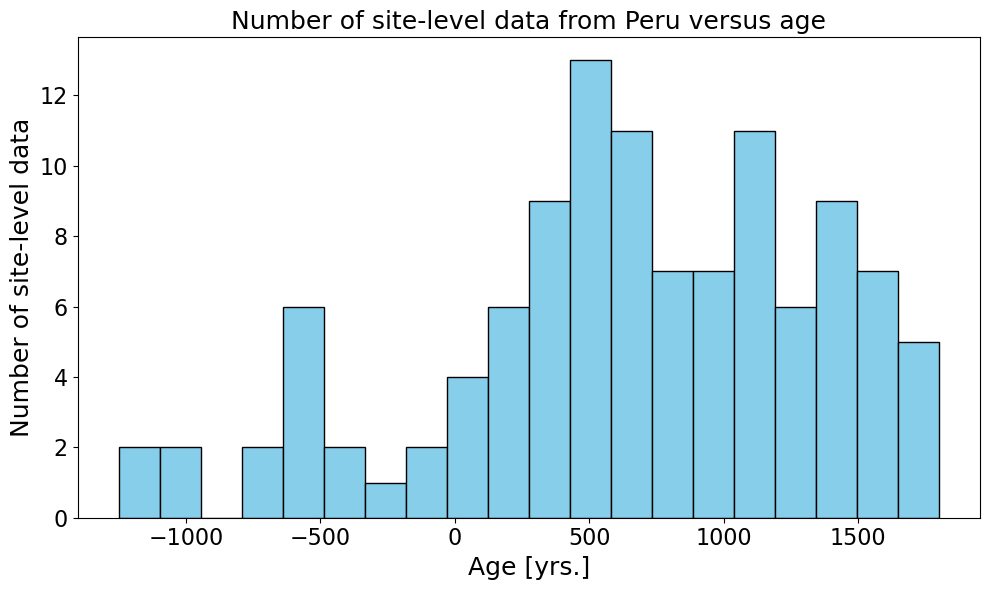

In [9]:
# importing the 'matplotlib.pyplot' library to create the plots
import matplotlib.pyplot as plt

# (optional but useful) ensures that the "location" and "level" columns are cleaned by converting the cell values to strings and removing leading and trailing whitespace from each cell
sageomag["location"] = sageomag["location"].astype(str).str.strip()
sageomag["level"] = sageomag["level"].astype(str).str.strip()

# filtering to select only site-level data from Peru
sageomag_peru_sites = sageomag[(sageomag["location"] == "Peru") & (sageomag["level"] == "1")]

# (optional but useful) removing rows with missing values (NaN) in the "Age[yr.]" column, ensuring that only data with valid age is used in the plot
sageomag_peru_sites = sageomag_peru_sites[sageomag_peru_sites["Age[yr.]"].notna()]

# plot settings
plt.figure(figsize=(10, 6))
plt.hist(sageomag_peru_sites["Age[yr.]"], bins=20, color='skyblue', edgecolor='black')

# plot elements
plt.title("Number of site-level data from Peru versus age", fontsize=18)
plt.xlabel("Age [yrs.]", fontsize=18)
plt.ylabel("Number of site-level data", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

## Example 05 - Plotting a pie chart to visualize the site-level data classified according to their 'material' (type)

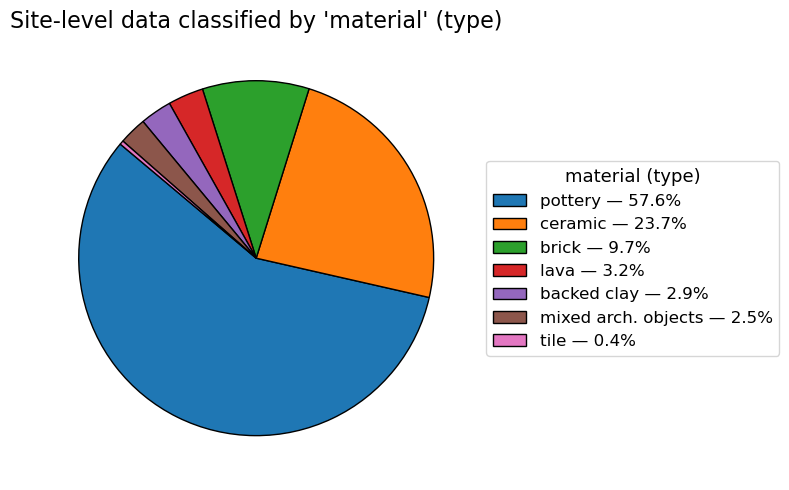

In [10]:
# (optional but useful) ensures that the "level" and "material" (type) columns are cleaned by converting the cell values to strings and removing leading and trailing whitespace from each cell
sageomag["level"] = sageomag["level"].astype(str).str.strip()
sageomag["material"] = sageomag["material"].astype(str).str.strip()

# selecting only site-level data
site_level_data = sageomag[sageomag["level"] == "1"]

# counting the "material"
material_counts = site_level_data["material"].value_counts()
labels = material_counts.index
counts = material_counts.values
total = counts.sum()
percentages = [f"{(count / total * 100):.1f}%" for count in counts]

# plot settings
fig, ax = plt.subplots(figsize=(7, 5))

# creating the pie chart
wedges, texts = ax.pie(counts, labels=None, startangle=140, colors=plt.get_cmap('tab10').colors[:len(counts)], wedgeprops=dict(edgecolor='black'))

# setting the pie chart legend
legend_labels = [f"{label} — {percent}" for label, percent in zip(labels, percentages)]
ax.legend(wedges, legend_labels, title="material (type)", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=13)

# title
plt.title("Site-level data classified by 'material' (type)", fontsize=16)

plt.tight_layout()
plt.show()

## Example 06 - Scatter plot with discrimination regarding the level of recording

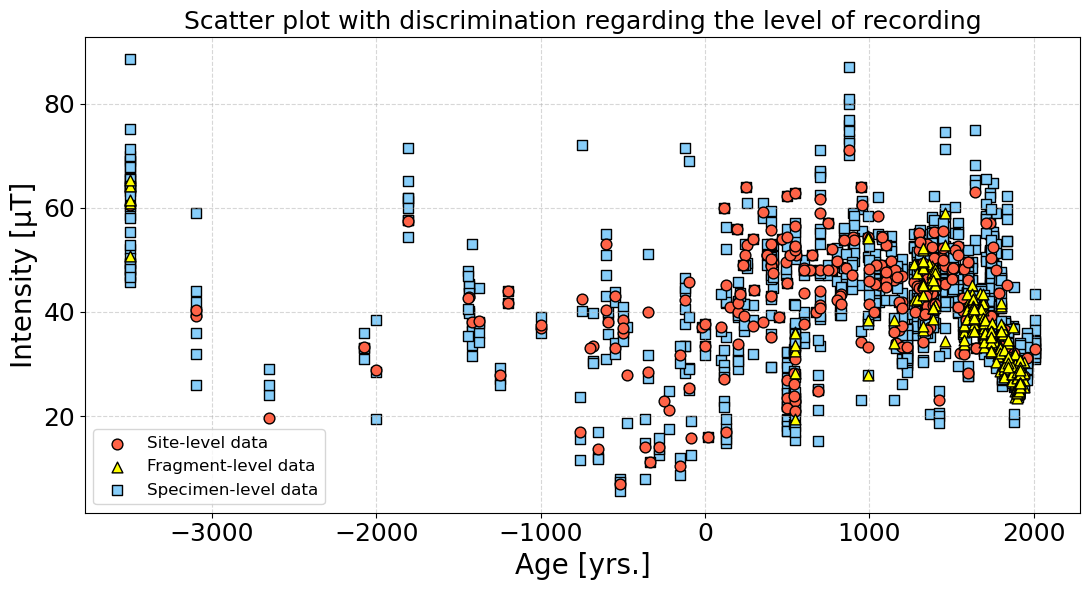

In [11]:
# (optional but useful) ensures that the "level" column are cleaned by converting the cell values to strings and removing leading and trailing whitespace from each cell
sageomag["level"] = sageomag["level"].astype(str).str.strip()

# converting the columns "Age (yr. AD)" and "F (μT)" to numeric values ​​(float).
sageomag["Age[yr.]"] = pd.to_numeric(sageomag["Age[yr.]"], errors='coerce')
sageomag["F[μT]"] = pd.to_numeric(sageomag["F[μT]"], errors='coerce')

# datasets coupling according to their level (1-site, 2-fragment, 3-specimen)
sageomag_level1 = sageomag[sageomag["level"] == "1"]
sageomag_level2 = sageomag[sageomag["level"] == "2"]
sageomag_level3 = sageomag[sageomag["level"] == "3"]

# plot settings
plt.figure(figsize=(11, 6))

# plotting the datasets with different markers and colors
plt.scatter(sageomag_level1["Age[yr.]"], sageomag_level1["F[μT]"],
            color='tomato', label='Site-level data', marker='o', s=60, edgecolor='black', zorder=2)

plt.scatter(sageomag_level2["Age[yr.]"], sageomag_level2["F[μT]"],
            color='yellow', label='Fragment-level data', marker='^', s=60, edgecolor='black', zorder=3)

plt.scatter(sageomag_level3["Age[yr.]"], sageomag_level3["F[μT]"],
            color='lightskyblue', label='Specimen-level data', marker='s', s=60, edgecolor='black', zorder=1)

# plot elements
plt.title("Scatter plot with discrimination regarding the level of recording", fontsize=18)
plt.xlabel("Age [yrs.]", fontsize=20)
plt.ylabel("Intensity [μT]", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()

## Example 07 - Geographical distribution of the data comprised in SAGEOMAG database (Archeological and Volcanic discrimination)

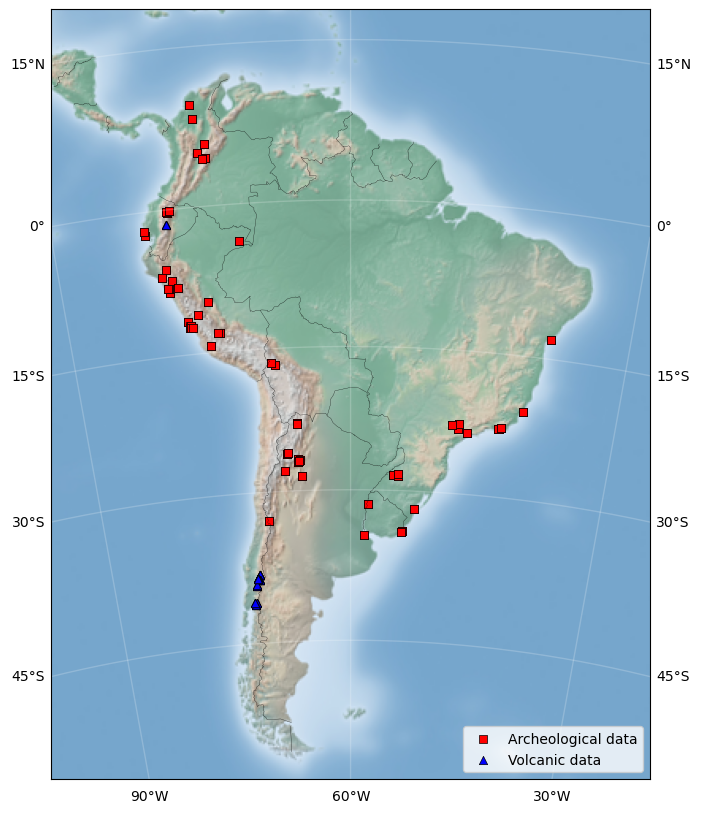

In [12]:
# importing the 'Basemap' library to create maps with cartographic projections
from mpl_toolkits.basemap import Basemap

# importing the 'Chain' function, which is useful for dealing with latitude/longitude lines when drawing grids on the map
from itertools import chain

# importing the "Numpy" library, which is appropriate to deal with matrices and arrays
import numpy as np

# separation of data into two subsets: "Archeological" and "Volcanic"
arch_data = sageomag[sageomag["type"] == "Archeological"]
volc_data = sageomag[sageomag["type"] == "Volcanic"]

# extraction of latitude and longitude values ​​from sites
site_lat_arch = arch_data["site_lat[deg]"].values
site_lon_arch = arch_data["site_lon[deg]"].values
site_lat_volc = volc_data["site_lat[deg]"].values
site_lon_volc = volc_data["site_lon[deg]"].values

# plot settings
fig = plt.figure(figsize=(10, 10), dpi=100)
m = Basemap(projection='lcc', resolution='l',
            lon_0=-60, lat_0=-20, lat_1=-20, lat_2=-20,
            width=0.7E7, height=0.9E7)

# conversion of coordinates (latitude and longitude) to the projected coordinate system of the map
lon_arch, lat_arch = m(site_lon_arch, site_lat_arch)
lon_volc, lat_volc = m(site_lon_volc, site_lat_volc)

# plotting the scatter points
m.scatter(lon_arch, lat_arch, marker='s', edgecolor='black', linewidth=0.5,
          facecolor='red', alpha=1.0, label='Archeological data')
m.scatter(lon_volc, lat_volc, marker='^', edgecolor='black', linewidth=0.5,
          facecolor='blue', alpha=1.0, label='Volcanic data')

# drawing the political borders of the countries
m.drawcountries(color='black', linewidth=0.2)

# drawing shaded protuberances and latitude and longitude lines on the map
def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    lats = m.drawparallels(np.arange(-90, 91, 15), labels=[1, 1, 0, 0], fmt='%d')
    lons = m.drawmeridians(np.linspace(-180, 180, 13), labels=[0, 0, 0, 1])
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    for line in all_lines:
        line.set(linestyle='-', alpha=0.2, color='w')

# setting the legend
plt.legend(loc='lower right', frameon=True, fontsize=10)

# exhibition of the map with all settings
draw_map(m)
plt.show()